# Data visualization with Matplotlib/ggplot

#### Table of contents
0. Why bother using ggplot/Seaborn?
1. A brief introducion to ggplot
2. Seaborn Overview
3. Comparing Matplotlib with ggplot/Seaborn
4. Conclusion: Pros and Cons of different plotting package

For python user using Matplotlib, this tutorial will introduce you to ggplot and Seaborn. I will give you some scenario and example when and why sometimes you would prefer using ggplot/Seaborn instead of matplotlib.

For R user, this tutorial will help you migrate from ggplot to Matplotlib. You might already be very familiar to ggplot syntax, but there are some syntax difference between real ggplot2 in R and ggplot in python. By going through the 2 scenarios, you will have a deeper understanding of the different design philosophy behind Matplotlib and ggplot. Hopefully, this tutorial can also help you understanding matplotlib better. 


# 1. Why bother using ggplot/Seaborn?
In some senarios, Matplotlib code is cumbersome, you have to do a lot work to make it right. ggplot Seaborn is elegent and compact. I will demonstrate this by using 2 scenarios.

The first scenario is "Student Grade Distribution", the second scenario is "Iris data". In this 2 scenario, I will draw histogram and discuss mainly 2 things:
1. the syntax of plotting basic histogram
2. change the color and style of graph
3. plotting multiple graph
4. side-by-side comparison of 3 tools

# 2. Introduction to ggplot

> ggplot is not a good fit for people trying to make highly customized data visualizations. While you can make some very intricate, great looking plots, ggplot sacrafices highly customization in favor of generall doing "what you'd expect".

Some useful link:
- [official website of ggplot](http://ggplot.yhathq.com/)
- [Github repo](https://github.com/yhat/ggplot)
- [A Dramatic Tour through Python’s Data Visualization Landscape (including ggplot and Altair)](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/). This lecture compared 4 distinctive visualizing tools in python. I found it extremely useful. 
- [A slide introducing ggplot in python](http://www.slideshare.net/Yhat/ggplot-for-python)
- [R for data science](http://r4ds.had.co.nz/data-visualisation.html). This is a R doc, but ggplot in python is nearly a copy of ggplot of R, referencing to some R doc might be helpful.


## Installation
To install the ggplot, type the following line in your console.  

```bash
pip install ggplot
```

Note: You may try to install ggplot using `conda install ggplot`, however this will fail because ggplot is not officially included in the conda. Install it using `pip` is recommended.

In [38]:
%matplotlib inline
from ggplot import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## ggplot sketch
First, let's make up a dataset. To have a idea about this data set, see the output of the `dat.head()`.

In [4]:
# generate a 20x3 dataframe
d = {'xvar': range(10) + np.random.normal(0, 3, 10), 
     'yvar': range(10) + np.random.normal(0, 3, 10), 
     'condition': ['A']*5 + ['B']*5}
dat = pd.DataFrame(d)
dat

,condition,xvar,yvar
0,A,0.110926,-0.093354
1,A,-3.926996,1.219002
2,A,-3.892692,7.898972
3,A,4.025619,1.259826
4,A,11.035310,-0.674781
5,B,3.114852,6.716287
6,B,-2.453766,-0.040606
7,B,11.198548,11.031946
8,B,16.275263,10.344944
9,B,6.072599,8.279869


Next, let's start with the simplest case, draw a scatterplot! This will make a scatter plot for you:
```python
ggplot(dat, aes(x='xvar', y='yvar')) + geom_point()
```

For R user, this code must look very familiar to you. But note that, column name needs to be quoted, it is passed as a string in python.

For Matplotlib, you may found this line of code really wired! Let me explain this to you in details. The way that ggplot construct a graph is to add different layers to the graph.

`ggplot()` defines the base layer components of our chart. `ggplot()` have 2 argument:
1. The data for the plot (the data frame being used)
2. How your data will relate to your plots, like x axis, y axis; size, color, shape of the points (the [aesthetics](https://github.com/yhat/ggplot/blob/master/docs/plotting/aesthetics.ipynb) [2](http://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings))

After setting up the base layer using `ggplot(dat, aes(x='xvar', y='yvar'))`, we can make complex graphics by adding more layers on the base graph. For example, we can plot scatter points by adding a `geom_point()` layer.

I will show you how to build the graph one step by one step now.

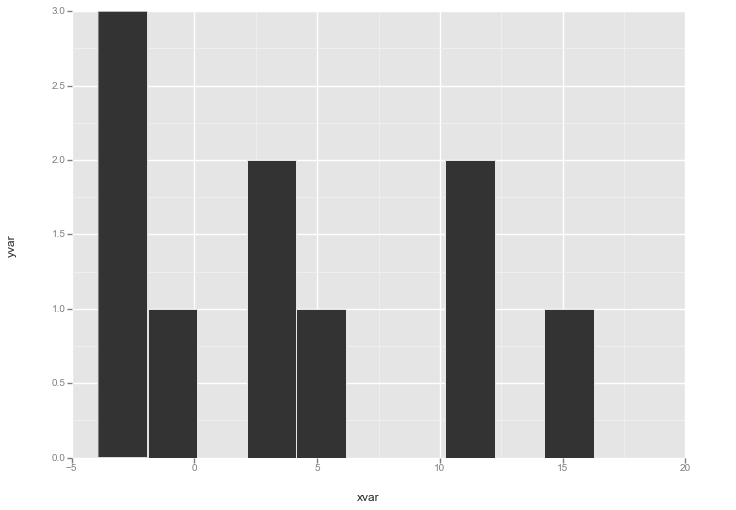

<ggplot: (290483005)>

In [5]:
# plot a histogram
ggplot(dat, aes(x='xvar', y='yvar')) + geom_histogram()

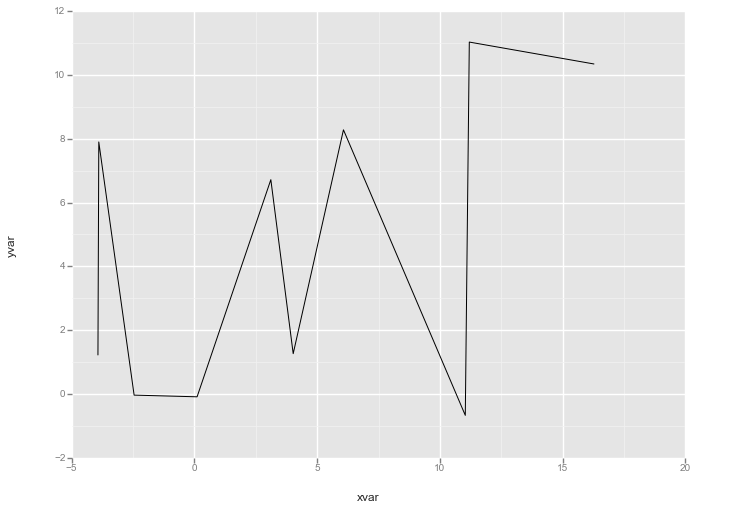

<ggplot: (291017021)>

In [6]:
# plot a line
ggplot(dat, aes(x='xvar', y='yvar')) + geom_line()

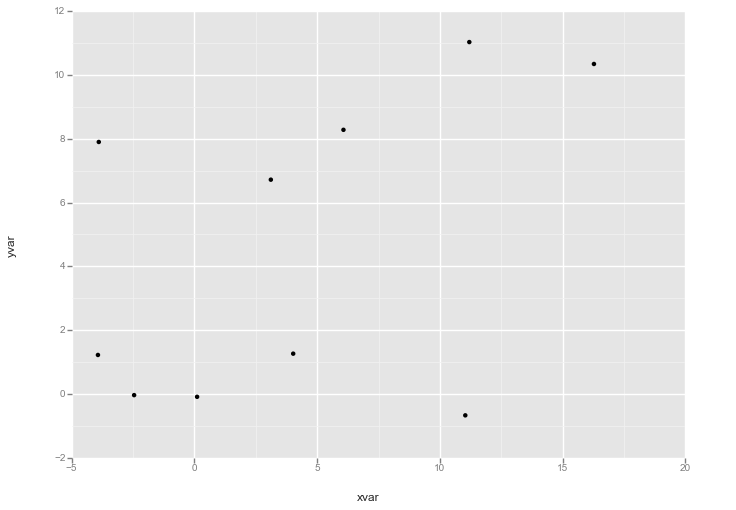

<ggplot: (291202453)>

In [7]:
# plot scatter points
ggplot(dat, aes(x='xvar', y='yvar')) + geom_point()

### Adding a linear regression line
Let's try more to add a linear regression line. To do this, we need to add a `stat_smooth(method='lm')` layer. 

`'lm'` means 'linear regression'. By default, this will includes 95% confidence region, as shown as the shaded area.
We can also plot without the shadded confidence interval. To do this, set `se='false'`.

/Users/hexiaoyu/anaconda/lib/python2.7/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


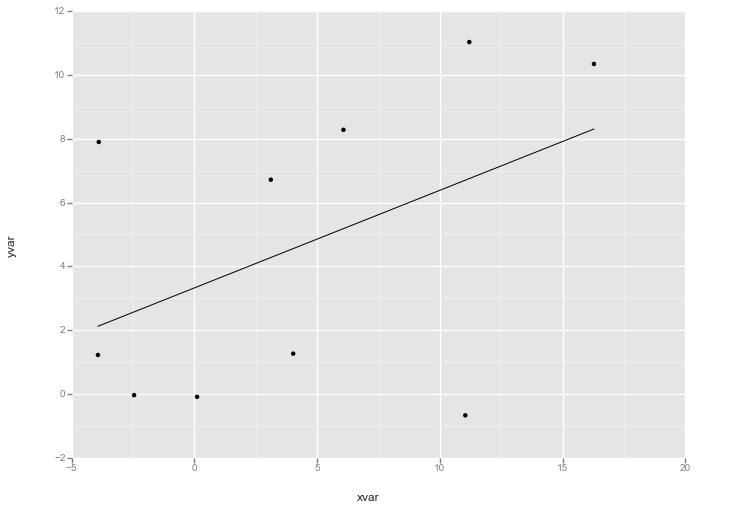

<ggplot: (291347245)>

In [8]:
ggplot(dat, aes(x='xvar', y='yvar')) + geom_point() + stat_smooth(method='lm', se='false')

Now, how to give different scatter points different colors depending on the condition variable? In ggplot, you can color or shape by an variable. Below is how we color our graph based on value of 'cond' column.

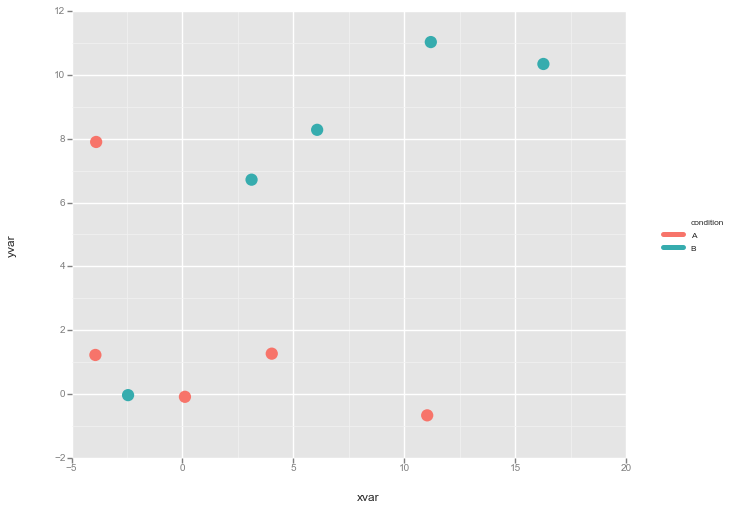

<ggplot: (291781309)>

In [9]:
ggplot(dat, aes(x='xvar', y='yvar', color='condition')) + geom_point(size=150)

We can also plot different regression lines based on color.

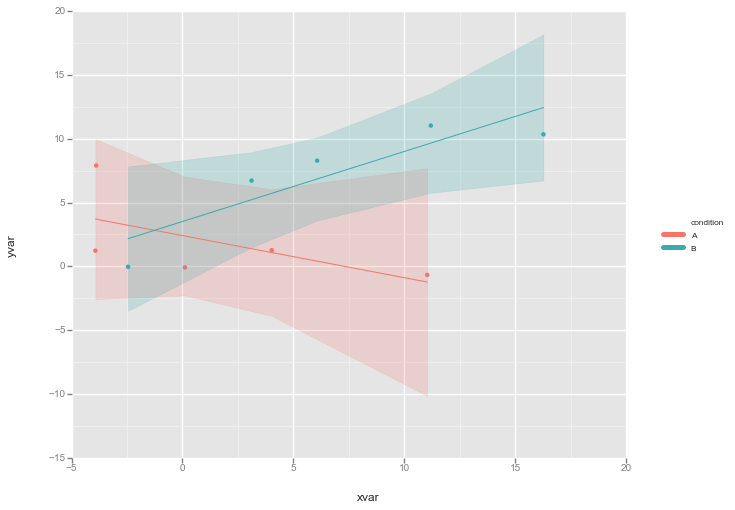

<ggplot: (291079109)>

In [10]:
ggplot(dat, aes(x='xvar', y='yvar', color='condition'))\
        + geom_point()\
        + stat_smooth(method='lm', fullrange='true')

In ggplot, you can assign the object `ggplot()` returns to a variable. Then, adding new attributes to this layer. Let me illustrate it with following example:

In [11]:
# Assign the object that `ggplot()` returns to a variable
dia = ggplot(diamonds, aes(x='clarity', y='price'))

## Add a title:
dia + geom_boxplot() + ggtitle("Diamond");

## If the title is long, it can be split into multiple lines with \n
dia + ggtitle("Diamond\nThis is a very long title");

## Change background to white
dia + ggtitle("Diamond\nThis is a very long title") +  theme_bw();

# Change Axes names  
dia + xlab("new X axis name") + ylab("new Y axis name"); # change x, y axes names

# 3. Seaborn Overview

Some useful resources:

* [Seaborn official document](http://seaborn.pydata.org/index.html)
* [An unofficial Seaborn tutorial][unofficial]
* [Another unoffical Seaborn tutorial](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)
* A stackoverflow post comparing matplotlib object-oriented interface with Seaborn. [link](http://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface)


### Installation:
You can refer to this [installation guide](http://seaborn.pydata.org/installing.html).

For your convenience, this is command for install Seaborn.
```
conda install seaborn
```

### Seaborn sketch
Let me begin by citing the Seaborn official documentation:

> If matplotlib ‘tries to make easy things easy and hard things possible,’ seaborn tries to make a well-defined set of hard things easy too.
>
> Seaborn should be thought of as a complement to matplotlib, not a replacement for it. [4](http://seaborn.pydata.org/introduction.html)


* Seaborn's built-in themes are much more better than default matplotlib aesthetics. Even now matplotlib support Seaborn theme (which I will show it later in this noteobook), Seaborn still have several advantages.
* Seaborn can do a lot of sophisicated statistical work easily.

I think this [unofficial Seaborn tutorial][unofficial] gives a faily good introduction to Seaborn. In most of the cases, you will find seaborn much more powerful than Matplotlib. Seaborn definetly worth spend some time learning.

Since there are already some fairly good Seaborn tutorials, I think there is no need for me to duplicate the work. Please refer to those resources if you want to learn more. In the following section, I will compare Matplotlib, ggplot, Seaborn in 2 scenarios.

[unofficial]:https://github.com/oreillymedia/introduction-to-seaborn/blob/master/intro-to-seaborn.md

# 4. Comparing Matplotlib with ggplot/Seaborn

## Senario 1: Student Grade Distribution

Suppose you want to know the distribution of student's grade. The example data is:

In [12]:
edu = pd.read_csv('tutorial_edu.csv')
print len(edu)
edu.head()

50


,M1,M2,P1,P2,F,Total
0,86.122760,72.619969,45.086135,56.668942,95.0,71.0
1,85.478777,72.189228,66.944689,89.068604,85.0,75.0
2,87.149706,64.860001,51.437478,67.307984,4.0,39.0
3,75.429333,89.181503,61.420725,84.095960,20.0,38.0
4,84.529962,73.596047,56.968285,94.492386,86.0,63.0


This is a grade data of 400 students. M1, M2 is grade of 2 midterms. P1, P2 is grade of 2 programming assignments. F is grade of final exam. 

What is distribution of student's grade on M1, M2, P1, P2, F, respectively? We can answer this quesiton by draw a Histogram. 

### Histogram in `matplotlib`

Let's draw it in Matplotlib first. This is the matplotlib hist api link [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). For you convenience, this is the api signature:

    matplotlib.pyplot.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

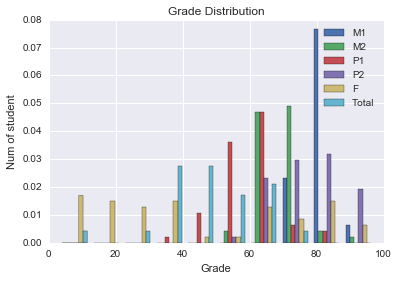

In [36]:
n_bins = 10
labels = ['M1', 'M2', 'P1', 'P2', 'F', 'Total']

plt.hist(edu.values, bins=n_bins, normed=1, histtype='bar', label=labels) # using the default color
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.legend()

Note about `legend()`: To use the legend, we have to pass `label` argument for the graph. That means, we can't use the default color of `hist`, we have to explicitly pass the `color` and `label` to the `hist` function.


What if I don't want to use the default color? The following program demonstrates how to explicitly set the color.

### Color scheme in `matplotlib`

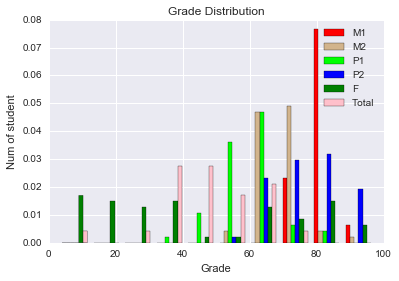

In [14]:
# setting self defined color
colors = ['red', 'tan', 'lime', 'blue', 'green', 'pink']

labels = ['M1', 'M2', 'P1', 'P2', 'F', 'Total']
plt.hist(edu.values, bins=10, normed=1, histtype='bar', color=colors, label=labels) # using the default color
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.legend()
plt.show()

Yes, I hear you crying. "OMG. This graph is toooo ugly!! How can you picked those ugly colors?".

Colors is important. In matplotlib, there are some ways that you can automaticlly generate colors for your graph. So far, I've found 2 way to let the matplotlib auto scale the color.

1. Using `colormap`. [Reference link to colormap](http://matplotlib.org/examples/color/colormaps_reference.html). You can choose a lot of color style from it. 
2. Using `stylesheet`. [stylesheet guide](http://matplotlib.org/users/style_sheets.html). The most common style would be `ggplot` and `seaborn`.

The following 2 programs demonstrates how to use colormap and style sheet. To keep the code short, I will skip setting the `title`, `xlabel` and `ylabel`.

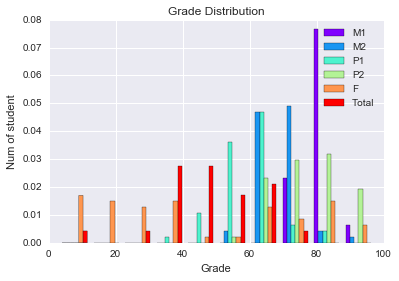

In [15]:
# New way: using the colormap to automaticlly scale the color
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 6))
# Please try the following colors!
# colors = cm.autumn(np.linspace(0, 1, 6))
# colors = cm.gist_earth(np.linspace(0, 1, 6))

labels = ['M1', 'M2', 'P1', 'P2', 'F', 'Total']
plt.hist(edu.values, bins=10, normed=1, histtype='bar', color=colors, label=labels) # using the default color
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.legend()

To know the style available, use `print(plt.style.available)`.

```python
print(plt.style.available)
```

To use that style for the rest of our life, our we can use
```python
plt.style.use('ggplot')
```

To only use that style for some particular code blocks.
```python
with plt.style.context(('fivethirtyeight'))
```


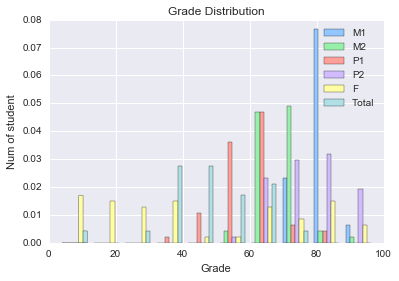

In [16]:
# To use the styles, we can use 
# plt.style.use('ggplot')
# plt.style.use('classic')
# plt.style.use('bmh')
# plt.style.use('seaborn-pastel')

labels = ['M1', 'M2', 'P1', 'P2', 'F', 'Total']

# By using 
with plt.style.context(('seaborn-pastel')):
    plt.hist(edu.values, bins=10, normed=1, histtype='bar', label=labels) # using the default color

plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Num of student')
plt.legend()

### Color scheme in `ggplot`
We can also plot a density line:

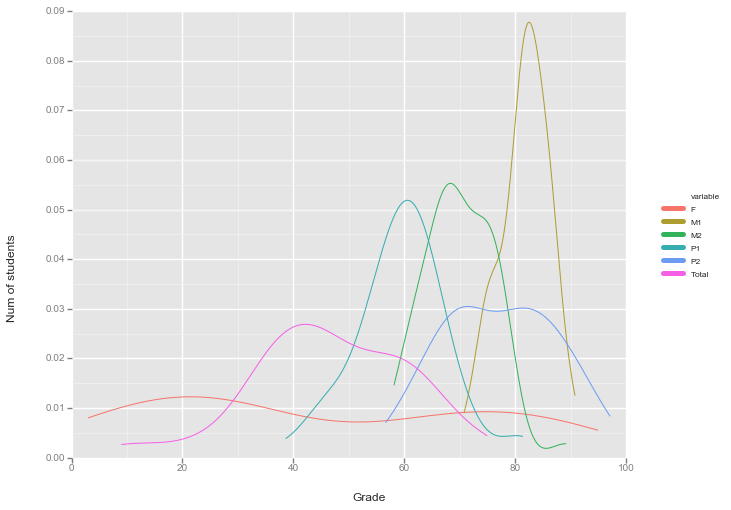

<ggplot: (296230413)>

In [17]:
ggplot(pd.melt(edu), aes(x='value', color='variable')) + \
        geom_density(binwidth=10) + \
        xlab("Grade") + ylab("Num of students")

Changing the color style in ggplot is also easy. Just add a color layer to your current layer. For example, add a `scale_color_brewer()` or `scale_color_gradient()` layer.

Try colors in this [link](https://github.com/yhat/ggplot/tree/master/docs), they are really pretty.

* [`scale_color_brewer()`](http://ggplot.yhathq.com/docs/scale_color_brewer.html)
* [ how to use `scale_color_brewer()`](https://github.com/yhat/ggplot/blob/master/docs/scales/scale_color_brewer.ipynb)


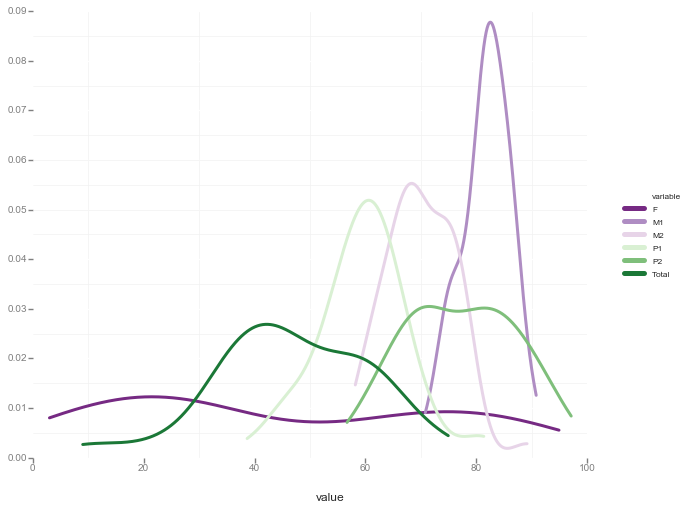

<ggplot: (298273905)>

In [18]:
ggplot(pd.melt(edu), aes(x='value', color='variable')) + \
    geom_density(binwidth=10, size=3) + \
    scale_color_brewer(type='div', palette=2) +\
    theme_bw()

## Plot multiple Graph in `matplotlib`
In the above example, it would be much better if we can plot the distribution of each exam in the different graph. To plot multiple graph, we can use [`subplot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot) command. Typical call signature is:
```python
# subplot(nrows, ncols, plot_number)
fig, axes = plt.subplots(nrows=3, ncols=2)
```

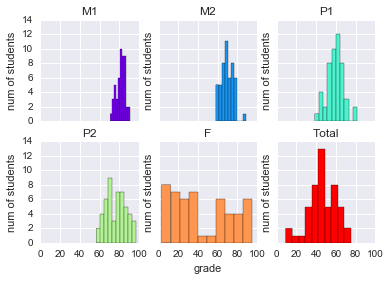

In [32]:
nrows = 2
ncols = 3
n_bins = 10

# we have to set sharex and sharey to make the subplot share the axis
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
axes_flat = axes.flat
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, nrows * ncols))

for i in range(nrows*ncols):
    axes_flat[i].hist(edu.iloc[:, [i]].values, n_bins, histtype='bar', color=colors[i])
    axes_flat[i].set(ylabel='num of students', title=edu.columns[i])
    if i == nrows*ncols - 2:
        axes_flat[i].set(xlabel='grade')


## Plot multiple Graph in `ggplot`

Ok, now let me try to handle histogram, color, legend in ggplot. Plotting multiple histograms in ggplot is as easy as pie. We can easily plot multiple chart by using the `facet_wrap()`. 

Compare to `matplotlib`, `ggplot` have several **advantages**:

* No loop needed. (in matplotlib we have to loop through all the subplots)
* No need to consider number of columns, number of rows, what color to use. (in matplotlib we have set color for each subplot)
* Legend and title are set automaticlly. (in matplotlib we have set `legend()`)
* x and y axis are automaticlly scaled for all graphs. (in matplotlib we have set `sharex` and `sharey`)

As you can see, `ggplot` automaticlly handles many things for us. However, instead of passing the original `edu` dataframe, we are passing `pd.melt(edu)` here to `ggplot`. Please have a look and `pd.melt()` function, and you will understand why we are doing this transformation. Don't worry if you don't quite understand this, we will mention this again in the next senario.

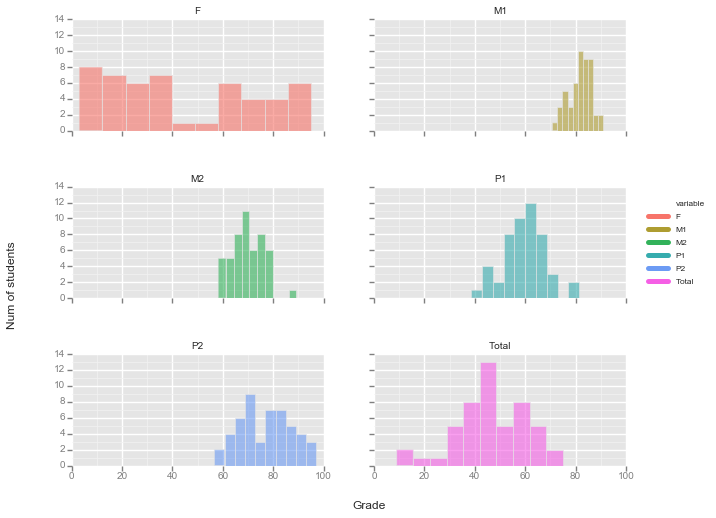

<ggplot: (298206941)>

In [20]:
ggplot(pd.melt(edu), aes(x='value', fill='variable')) + \
        geom_histogram(alpha=0.6) + \
        facet_wrap('variable') + \
        xlab("Grade") + ylab("Num of students")

## Plot multiple Graph in `seaborn`

* `FacetGrid`: allow us to plotting based on segment of our data.
* `col='variable'`: columns are differentiated by the value of `variable` 
* `hue='variable'`: colors are differentiated by he value of `variable` 
* `col_wrap=3`: 'wrap' the column and make it have maximun 3 subplot per line

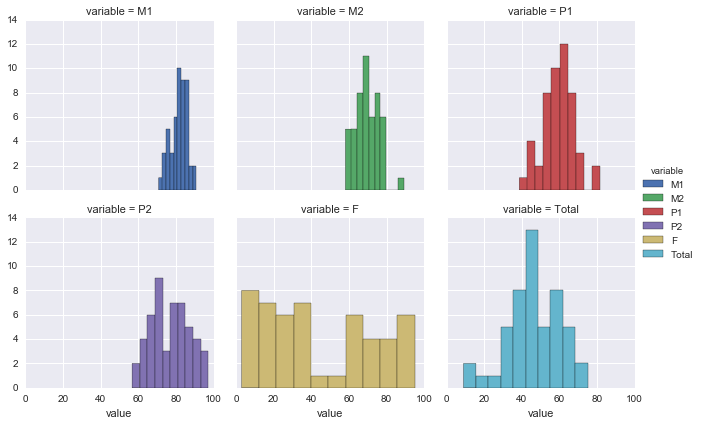

In [21]:
g = sns.FacetGrid(pd.melt(edu), col='variable', hue='variable', col_wrap=3)
g.map(plt.hist, "value").add_legend()

# Senario 2: Iris Data
### Suppose you want to plot the histogram depends on different value of one column

Take "Iris" dataset for example. The question is: "How to plot the histograms based on different species?"

In [22]:
# sepalLength,sepalWidth,petalLength,petalWidth,species
iris = pd.read_csv('iris.csv')
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Put  Matplotlib, ggplot, Seaborn together
**Matplotlib:**
To do this in `matplotlib`, we need to treat different species as different graphs. We need to loop through different species one by one and make the subplot one by one.

**ggplot:**
Plot multiple histogram based on the species is easy in `ggplot`. We need to pass the `species` into the `facet_grid` function, telling `ggplot` that we will plot subplots based on `species` column in the data.

**Seaborn:**
To do this in Seaborn, we can use `FacetGrid()`, `g.map()` to map our data in to different plot based on the species. The details are explained below:

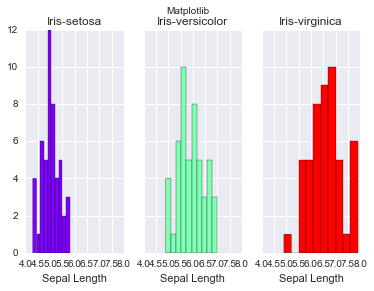

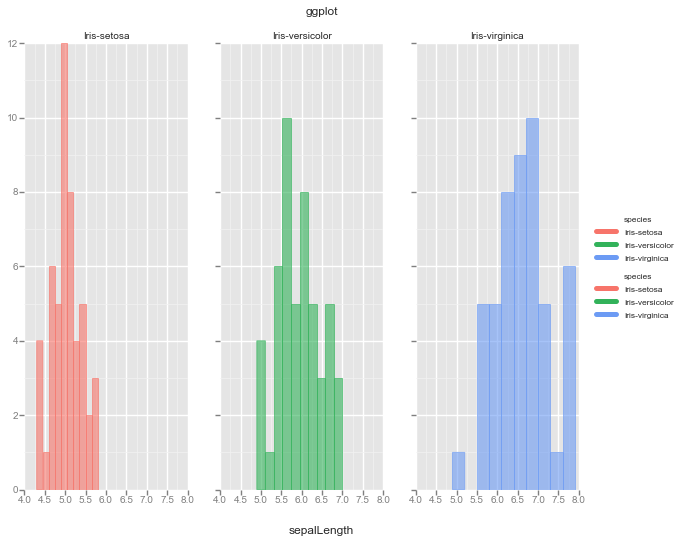

<ggplot: (310249369)>


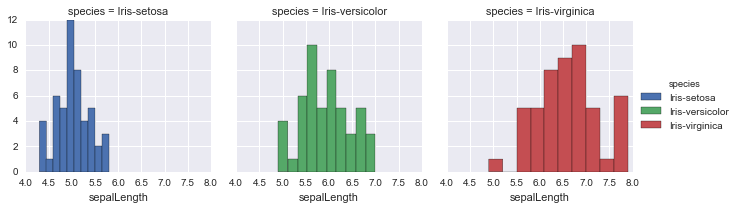

In [50]:
# #---------------------------matplotlib------------------------------
n_bins = 10
ncols = len(iris.species.unique())
colors = cm.rainbow(np.linspace(0, 1, ncols))

# we have to set sharex and sharey to make the subplot share the axis
fig, axes = plt.subplots(ncols=ncols, sharex=True, sharey=True)

for i, specie in enumerate(iris.species.unique()):
    axes[i].hist(iris[iris.species == specie].sepalLength, histtype='bar', color=colors[i])
    axes[i].set(title=specie, xlabel='Sepal Length')
    
# to set global title
fig.suptitle('Matplotlib')
plt.show()

# #---------------------------ggplot------------------------------
g2 = ggplot(iris, aes(x='sepalLength', color='species', fill='species')) + \
        geom_histogram(alpha=0.6) + \
        facet_grid(None, 'species') + \
        ggtitle('ggplot')
print g2        

#---------------------------Seaborn------------------------------
g3 = sns.FacetGrid(iris, col='species', hue='species')
g3.map(plt.hist, "sepalLength").add_legend()

# Conclusion


Seaborn and ggplot are higher level tools built upon Matplotlib. Matplotlib is much more lower level, but have much more control over our graphs as long as we understand the lowe level stuff. 

For people already familiared with matplotlib, Seaborn is really worth learning. (Actually, you might have already seen some stackoverflow post solving matplotlib problem using Seaborn.) By using both together, we can simplify the process of generating routine statistical graphs without losing full control of our graph.

ggplot is also great. But however, be awared that ggplot in python do not have full functionalities as ggplot2 in R. Some functionality in ggplot2(R) is missing in ggplot(python). However, we can still get most of work done with some help from `pandas`! Magic happens when you can make full use of `pandas` and ggplot. [5](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

I hope you enjoyed reading my tutorial. If you have any comments and suggestions, please don't hesitate to tell me. I hope my tutorial can help you plot better graph and plot it more effectivley. 